# ARUCO markers: basics

## 1:  Marker creation

In [2]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib nbagg

<IPython.core.display.Javascript object>


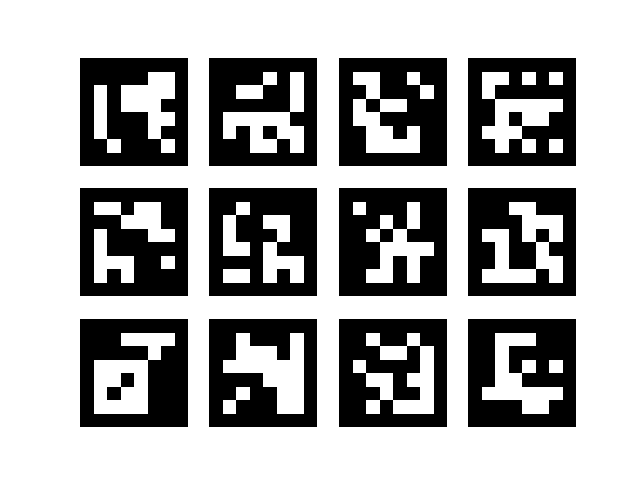

In [30]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

fig = plt.figure()
nx = 4
ny = 3
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("_data/markers.jpeg")    
plt.show()

## 2: Print, cut, stick and take a picture

In [4]:
frame = cv2.imread("_data/marqueurs_chaise.jpg")
plt.figure()
plt.imshow(frame)
plt.show()

<IPython.core.display.Javascript object>

## 3: Post processing

In [5]:
%%time
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)


Wall time: 178 ms


In [6]:
rejectedImgPoints[1]

array([[[ 1213.,  1229.],
        [ 1217.,  1221.],
        [ 1259.,  1224.],
        [ 1256.,  1229.]]], dtype=float32)

In [7]:
corners

[array([[[ 1339.,   951.],
         [ 1413.,   934.],
         [ 1434.,   981.],
         [ 1358.,   999.]]], dtype=float32), array([[[ 2247.,  1604.],
         [ 2306.,  1653.],
         [ 2263.,  1691.],
         [ 2203.,  1643.]]], dtype=float32), array([[[ 2071.,  1279.],
         [ 2101.,  1233.],
         [ 2162.,  1267.],
         [ 2132.,  1314.]]], dtype=float32), array([[[ 1209.,  1217.],
         [ 1297.,  1218.],
         [ 1290.,  1287.],
         [ 1201.,  1286.]]], dtype=float32), array([[[ 1507.,  1244.],
         [ 1510.,  1309.],
         [ 1421.,  1313.],
         [ 1419.,  1245.]]], dtype=float32), array([[[  940.,  1212.],
         [  933.,  1282.],
         [  840.,  1285.],
         [  849.,  1216.]]], dtype=float32), array([[[ 2736.,  1132.],
         [ 2764.,  1183.],
         [ 2723.,  1241.],
         [ 2701.,  1191.]]], dtype=float32), array([[[ 1140.,  1120.],
         [ 1129.,  1059.],
         [ 1214.,  1048.],
         [ 1226.,  1108.]]], dtype=float32),

Pretty fast processing !

## 4: Results

<IPython.core.display.Javascript object>


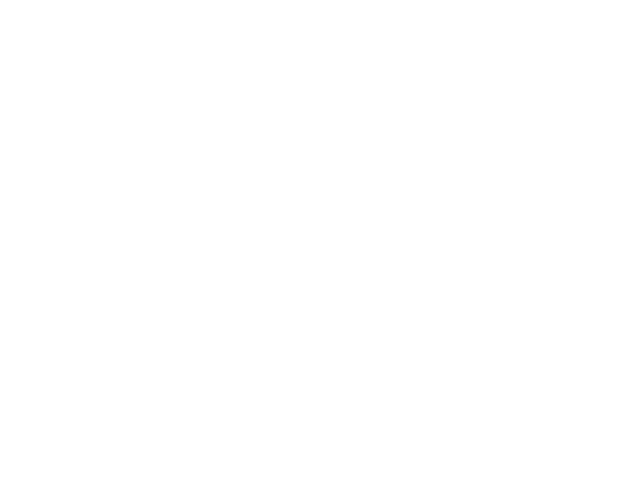

In [8]:
plt.figure()
plt.imshow(frame_markers, origin = "upper")
if ids is not None:
    for i in range(len(ids)):
        c = corners[i][0]
        plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "+", label = "id={0}".format(ids[i]))
"""for points in rejectedImgPoints:
    y = points[:, 0]
    x = points[:, 1]
    plt.plot(x, y, ".m-", linewidth = 1.)"""
plt.legend()
plt.show()

In [9]:
def quad_area(data):
    l = data.shape[0]//2
    corners = data[["c1", "c2", "c3", "c4"]].values.reshape(l, 2,4)
    c1 = corners[:, :, 0]
    c2 = corners[:, :, 1]
    c3 = corners[:, :, 2]
    c4 = corners[:, :, 3]
    e1 = c2-c1
    e2 = c3-c2
    e3 = c4-c3
    e4 = c1-c4
    a = -.5 * (np.cross(-e1, e2, axis = 1) + np.cross(-e3, e4, axis = 1))
    return a

corners2 = np.array([c[0] for c in corners])

data = pd.DataFrame({"x": corners2[:,:,0].flatten(), "y": corners2[:,:,1].flatten()},
                   index = pd.MultiIndex.from_product( 
                           [ids.flatten(), ["c{0}".format(i )for i in np.arange(4)+1]], 
                       names = ["marker", ""] ))

data = data.unstack().swaplevel(0, 1, axis = 1).stack()
data["m1"] = data[["c1", "c2"]].mean(axis = 1)
data["m2"] = data[["c2", "c3"]].mean(axis = 1)
data["m3"] = data[["c3", "c4"]].mean(axis = 1)
data["m4"] = data[["c4", "c1"]].mean(axis = 1)
data["o"] = data[["m1", "m2", "m3", "m4"]].mean(axis = 1)
data

c1      c2      c3      c4      m1      m2      m3      m4  \
marker                                                                     
1      x  1209.0  1297.0  1290.0  1201.0  1253.0  1293.5  1245.5  1205.0   
       y  1217.0  1218.0  1287.0  1286.0  1217.5  1252.5  1286.5  1251.5   
3      x  2736.0  2764.0  2723.0  2701.0  2750.0  2743.5  2712.0  2718.5   
       y  1132.0  1183.0  1241.0  1191.0  1157.5  1212.0  1216.0  1161.5   
4      x  1140.0  1129.0  1214.0  1226.0  1134.5  1171.5  1220.0  1183.0   
       y  1120.0  1059.0  1048.0  1108.0  1089.5  1053.5  1078.0  1114.0   
5      x  2071.0  2101.0  2162.0  2132.0  2086.0  2131.5  2147.0  2101.5   
       y  1279.0  1233.0  1267.0  1314.0  1256.0  1250.0  1290.5  1296.5   
6      x  1507.0  1510.0  1421.0  1419.0  1508.5  1465.5  1420.0  1463.0   
       y  1244.0  1309.0  1313.0  1245.0  1276.5  1311.0  1279.0  1244.5   
7      x  2247.0  2306.0  2263.0  2203.0  2276.5  2284.5  2233.0  2225.0   
       y  1604.0  1653.0  1691.0  1643.0  1628.5  1672.0  1667.0  1623.5   
9      x   940.0   933.0   840.0   849.0   936.5   886.5   844.5   894.5   
       y  1212.0  1282.0  1285.0  1216.0  1247.0  1283.5  1250.5  1214.0   
10     x   990.0   906.0   885.0   968.0   948.0   895.5   926.5   979.0   
       y  1050.0  1071.0  1013.0   993.0  1060.5  1042.0  1003.0  1021.5   
11     x  1339.0  1413.0  1434.0  1358.0  1376.0  1423.5  1396.0  1348.5   
       y   951.0   934.0   981.0   999.0   942.5   957.5   990.0   975.0   
12     x  1586.0  1513.0  1543.0  1616.0  1549.5  1528.0  1579.5  1601.0   
       y   950.0   929.0   879.0   899.0   939.5   904.0   889.0   924.5   

                o  
marker             
1      x  1249.25  
       y  1252.00  
3      x  2731.00  
       y  1186.75  
4      x  1177.25  
       y  1083.75  
5      x  2116.50  
       y  1273.25  
6      x  1464.25  
       y  1277.75  
7      x  2254.75  
       y  1647.75  
9      x   890.50  
       y  1248.75  
10     x   937.25  
       y  1031.75  
11     x  1386.00  
       y   966.25  
12     x  1564.50  
       y   914.25

In [31]:
# Plante un peu...
"""cap = cv2.VideoCapture('_data/AeroTrain.mp4')
while(cap.isOpened()):
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()"""

"cap = cv2.VideoCapture('_data/AeroTrain.mp4')\nwhile(cap.isOpened()):\n    ret, frame = cap.read()\n\n    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)\n\n    cv2.imshow('frame',gray)\n    if cv2.waitKey(1) & 0xFF == ord('q'):\n        break\n\ncap.release()\ncv2.destroyAllWindows()"

nframe = 712


<IPython.core.display.Javascript object>


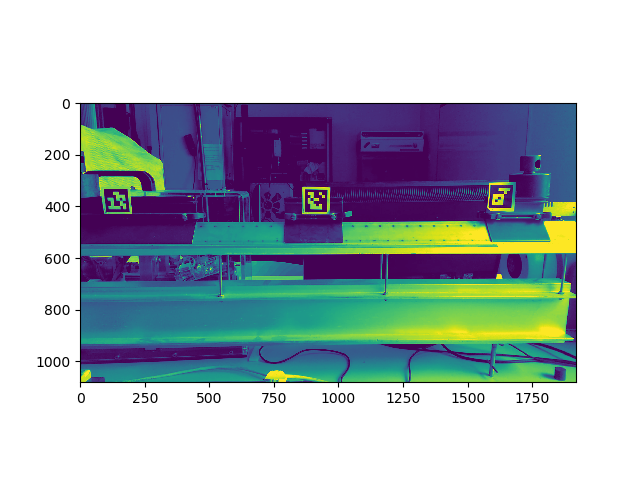

In [35]:
cap = cv2.VideoCapture('_data/AeroTrain.mp4')
nframe = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print("nframe =", nframe)
cap.set(1, 300) # arguments: 1: laisser, 2: numéro du frame
ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(gray)
plt.show()
cap.release()

In [36]:
%%time
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

Wall time: 31.3 ms


<IPython.core.display.Javascript object>


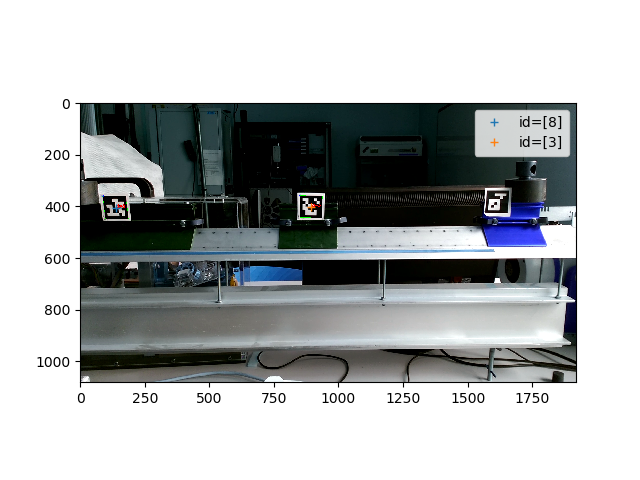

In [34]:
plt.figure()
plt.imshow(frame_markers, origin = "upper")
if ids is not None:
    for i in range(len(ids)):
        c = corners[i][0]
        plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "+", label = "id={0}".format(ids[i]))
"""for points in rejectedImgPoints:
    y = points[:, 0]
    x = points[:, 1]
    plt.plot(x, y, ".m-", linewidth = 1.)"""
plt.legend()
plt.show()

In [25]:
help(aruco.DetectorParameters_create)

Help on built-in function DetectorParameters_create:

DetectorParameters_create(...)
    DetectorParameters_create() -> retval
    .

